In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier  # MetaEstimador...
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.pipeline import Pipeline

from sklearn.inspection import permutation_importance


from sklearn import set_config
set_config(display='diagram')


In [127]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

df.isnull().sum().sum()
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


In [128]:
X = df.drop(columns='Sale_Price')
y = df.Sale_Price

In [129]:
import helpers as hp
datos_companeros = []
datos_companeros.append(hp.load_bytes_variable('../desafio_guiado_arboles/thomas-peet-actividad07.sav'))
datos_companeros.append(hp.load_bytes_variable('../desafio_guiado_arboles/braulio-aguila-actividad07.sav'))
# datos_companeros.append(hp.load_bytes_variable('../desafio_guiado_arboles/camilo-ramirez-actividad07.sav'))


X_train = datos_companeros[0]['X_train']
X_test  = datos_companeros[0]['X_test']
y_train = datos_companeros[0]['y_train']
y_test  = datos_companeros[0]['y_test']

In [148]:
pipe_rf = Pipeline(steps=[
    # ('prep', prep),
    ('model', RandomForestRegressor(random_state=11238, oob_score=True))
])

pipe_rf.fit(X_train, y_train)
metrics = {
        'r2_score': r2_score,
        'rmse_val': lambda x,y: np.sqrt(mean_squared_error(x,y)),
        'mae_val': median_absolute_error
    }


rf_scores = hp.report_regression_metrics(pipe_rf, X_test, y_test, metrics)
rf_scores

{'r2_score': 0.882, 'rmse_val': 25934.514, 'mae_val': 9892.12}

In [144]:
pipe_rf.get_params()

{'memory': None,
 'steps': [('model',
   RandomForestRegressor(max_features='sqrt', n_estimators=570, oob_score=True,
                         random_state=11238))],
 'verbose': False,
 'model': RandomForestRegressor(max_features='sqrt', n_estimators=570, oob_score=True,
                       random_state=11238),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 570,
 'model__n_jobs': None,
 'model__oob_score': True,
 'model__random_state': 11238,
 'model__verbose': 0,
 'model__warm_start': False}

In [131]:

params = {
    'model__max_features': [None, 'log2', 'sqrt'],
    'model__n_estimators': np.arange(20,1050,50)
    # 'model__n_estimators': np.arange(20,80,50)

}
oob_score = {}
for param1 in params['model__max_features']:
    for param2 in params['model__n_estimators']:
        pipe_rf_iterator = Pipeline(steps=[('model', RandomForestRegressor(random_state=11238, oob_score=True, max_features=param1, n_estimators=param2))])
        pipe_rf_iterator.fit(X_train, y_train)
        oob_score[str(param1)+'__'+str(param2)] = pipe_rf_iterator.named_steps.model.oob_score_
        # scores = hp.report_regression_metrics(pipe_rf, X_test, y_test, metrics)

# search = GridSearchCV(pipe_rf, params, cv=5, scoring='r2', n_jobs=-1)
# search.fit(X_train,y_train)
# search_scores_rf = hp.report_regression_metrics(search.best_estimator_, X_test, y_test, metrics)
# search_scores_dt_1 = hp.report_regression_metrics(datos_companeros[0]['model'], X_test, y_test, metrics)
# search_scores_dt_2 = hp.report_regression_metrics(datos_companeros[1]['model'], X_test, y_test, metrics)
# search_scores_rf, search_scores_dt_1, search_scores_dt_2

In [132]:
oob_df = pd.DataFrame([tuple(k.split("__") + [v]) for k, v in oob_score.items()])
oob_df.columns = ["max_features", "n_estimator", "oob_score"]
oob_df

,max_features,n_estimator,oob_score
0,None,20,0.861931
1,None,70,0.878969
2,None,120,0.883362
3,None,170,0.884162
4,None,220,0.885306
...,...,...,...
58,sqrt,820,0.884936
59,sqrt,870,0.884800
60,sqrt,920,0.884255
61,sqrt,970,0.884389


In [133]:
max_point = oob_df[oob_df.oob_score == oob_df.oob_score.max()]
max_point

,max_features,n_estimator,oob_score
53,sqrt,570,0.885744


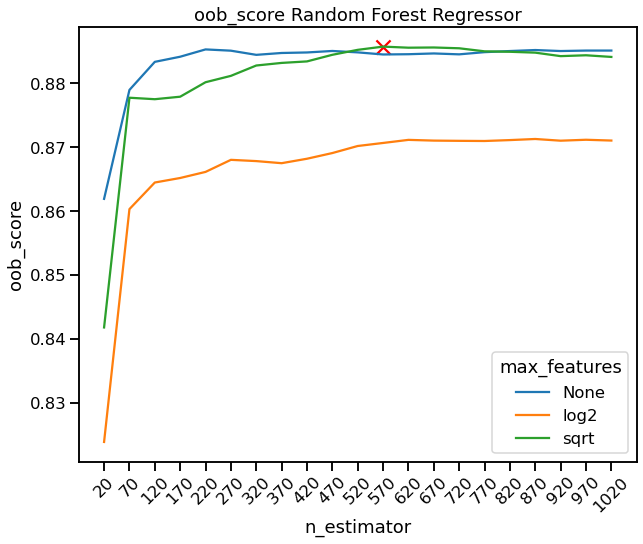

In [134]:
sns.set_context("talk")
plt.figure(figsize=(10,8))
sns.lineplot(data=oob_df, x="n_estimator", y="oob_score", hue="max_features")
plt.scatter(max_point.n_estimator, max_point.oob_score, marker='x', s=200, color='red')
plt.xticks(rotation=45)
plt.title("oob_score Random Forest Regressor");

In [138]:
max_point.n_estimator.iloc[0]

'570'

In [145]:
pipe_rf_final = Pipeline(steps=[('model', RandomForestRegressor(random_state=11238, oob_score=True, max_features=max_point.max_features.iloc[0], n_estimators=int(max_point.n_estimator.iloc[0])))])
pipe_rf_final.fit(X_train, y_train)
pipe_rf_final_scores = hp.report_regression_metrics(pipe_rf_final, X_test, y_test, metrics)
pipe_rf_final_scores


{'r2_score': 0.879, 'rmse_val': 26272.505, 'mae_val': 10030.033}

In [140]:
int('200')

200

In [150]:
pipe_rf.named_steps.model.oob_score_

0.8815347708621819

In [149]:
pipe_rf.get_params()

{'memory': None,
 'steps': [('model',
   RandomForestRegressor(oob_score=True, random_state=11238))],
 'verbose': False,
 'model': RandomForestRegressor(oob_score=True, random_state=11238),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 1.0,
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': True,
 'model__random_state': 11238,
 'model__verbose': 0,
 'model__warm_start': False}

In [147]:
pipe_rf_final.get_params()

{'memory': None,
 'steps': [('model',
   RandomForestRegressor(max_features='sqrt', n_estimators=570, oob_score=True,
                         random_state=11238))],
 'verbose': False,
 'model': RandomForestRegressor(max_features='sqrt', n_estimators=570, oob_score=True,
                       random_state=11238),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 570,
 'model__n_jobs': None,
 'model__oob_score': True,
 'model__random_state': 11238,
 'model__verbose': 0,
 'model__warm_start': False}